# IART Project - Supervised Learning

### [Sample Telco Customer Churn Dataset](https://www.kaggle.com/datasets/easonlai/sample-telco-customer-churn-dataset)

 Developed by:  
 Carlos Gomes – up201906622​  
 Domingos Santos – up201906680​  
 Filipe Pinto – up201907747  

 

## Table of contents

1. [Introduction](#Introduction)

2. [Specification](#Specification)

3. [Required libraries](#Required-libraries)

4. [Data Pre-Processing](#Data-Pre-Processing)

5. [Data Visualization](#Data-Visualization)

6. [Supervised Learning](#Supervised-Learning)

7. [Conclusions](#Conclusions)

8. [References](#Conclusions)

## Introduction
[[ go back to the top ]](#Table-of-contents)    

The main goal of this supervised learning problem is to learn how to classify examples in terms of the concept under
analysis using different learning algorithms. Then they should be compared using appropriate evaluation
metrics and according to the respective time spent to train/test the models. For this particular example we will study/implement the previous for [this](https://www.kaggle.com/datasets/easonlai/sample-telco-customer-churn-dataset) dataset

## Specification
[[ go back to the top ]](#Table-of-contents)  

It is important for a company to retain customers in order to maintain or even increase profit, so it might be very useful to predict their behaviour.​ To do that we need to make a market research to answer some questions.

So, given a dataset with information about telco customers we want to predict if a customer will churn or not, according to the percentage of churn in the dataset and if that number is affected by any other variable such as gender, services subscribed or even the charges of the customer.

Other important analysis for the company are the profit evaluation such as the most profitable service or feature and the ones not sot profitable.

All of this questions/doubts should be after the study of the dataset and that'ś the main goal of this project.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **missingno**:Provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset.
* **NumPy**: Provides a fast numerical array structure and helper functions.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **Plotly**: provides online graphing, analysis and statistics tools for individuals and collaboration, as well as scientific graphing libraries for python)
* **scikit-learn**: The essential Machine Learning package in Python.

In [1]:
import pandas as pd
import missingno as missno
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

## Data Pre-Processing

[[ go back to the top ]](#Table-of-contents)  

There are two datasets available let's call the main(with 7011 entries) and the other test (21 entries).
For our test/train model we will use the main one.
Before any attempt of method implementation we need to do some data analysis and pre-processing.
We first need to load the data. Then we may print some information about the dataset to get used to the way the information is organized and to know what our next step should be, such as statistics and possible missing and repeated values. The following topics indicate the description of each column in the dataset.

#### Column Description:
- customerID: A unique ID that identifies each customer.
- gender: The customer’s gender: Male (1), Female (0).
- SeniorCitizen: Indicates if the customer is 65 or older: No (0), Yes (1).
- Partner: Service contract is resold by the partner: No (0), Yes (1).
- Dependents: Indicates if the customer lives with any dependents: No (0), Yes (1).
- Tenure: Indicates the total amount of months that the customer has been with the company.
- PhoneService: Indicates if the customer subscribes to home phone service with the company: No (0), Yes (1).
- MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: No (0), Yes (1).
- InternetService: Indicates if the customer subscribes to Internet service with the company: No (0), DSL (1), Fiber optic (2).
- OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: No (0), Yes (1), NA (2).
- OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: No (0), Yes (1), NA (2).
- DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: No (0), Yes (1), NA (2).
- TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: No (0), Yes (1), NA (2).
- StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: No (0), Yes (1), NA (2). The company does not charge an additional fee for this service.
- StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: No (0), Yes (1), NA (2). The company does not charge an additional fee for this service.
- Contract: Indicates the customer’s current contract type: Month-to-Month (0), One Year (1), Two Year (2).
- PaperlessBilling: Indicates if the customer has chosen paperless billing: No (0), Yes (1).
- PaymentMethod: Indicates how the customer pays their bill: Bank transfer - automatic (0), Credit card - automatic (1), Electronic cheque (2), Mailed cheque (3).
- MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
- TotalCharges: Indicates the customer’s total charges.
- Churn: Indicates if the customer churn or not: No (0), Yes (1).



In [3]:
# Loading Data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2.csv')
data.head()

customerID  gender  SeniorCitizen  Partner  Dependents  Tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   
3             0              0                1               1  ...   
4             1              0                2               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1  

[5 rows x 21 columns]

In [4]:
# Data information (number of non-null values and data type)

data.info()
print("\n-----------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7011 non-null   object 
 1   gender            7011 non-null   int64  
 2   SeniorCitizen     7011 non-null   int64  
 3   Partner           7011 non-null   int64  
 4   Dependents        7011 non-null   int64  
 5   Tenure            7011 non-null   int64  
 6   PhoneService      7011 non-null   int64  
 7   MultipleLines     7011 non-null   int64  
 8   InternetService   7011 non-null   int64  
 9   OnlineSecurity    7011 non-null   int64  
 10  OnlineBackup      7011 non-null   int64  
 11  DeviceProtection  7011 non-null   int64  
 12  TechSupport       7011 non-null   int64  
 13  StreamingTV       7011 non-null   int64  
 14  StreamingMovies   7011 non-null   int64  
 15  Contract          7011 non-null   int64  
 16  PaperlessBilling  7011 non-null   int64  


In [5]:
# Number of null values (for each column and total)

data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Repeated values
data['customerID'].unique().size

7011

#### Missing and Repeated values
As we can see there are not any missing values in our dataset. If we needed to eliminate any duplicated value, it only could be a repeated customerid row, due to the types and values of each column (most of them can be represented as booleans so there must exist duplicate values in those columns) and, as we can see, the number of unique id's match exactly the number of rows so there is no repeated value. 

In [7]:
data.describe()

gender  SeniorCitizen      Partner   Dependents       Tenure  \
count  7011.000000    7011.000000  7011.000000  7011.000000  7011.000000   
mean      0.504636       0.162316     0.482955     0.298959    32.426615   
std       0.500014       0.368767     0.499745     0.457834    24.542847   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7011.000000    7011.000000      7011.000000     7011.000000   
mean       0.903295       0.422051         1.224076        0.719298   
std        0.295577       0.493922         0.778727        0.796531   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         1.000000        0.000000   
50%        1.000000       0.000000         1.000000        1.000000   
75%        1.000000       1.000000         2.000000        1.000000   
max        1.000000       1.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count    7011.00000       7011.000000  7011.000000  7011.000000   
mean        0.77735          0.776351     0.722579     0.816574   
std         0.77822          0.778575     0.795621     0.763104   
min         0.00000          0.000000     0.000000     0.000000   
25%         0.00000          0.000000     0.000000     0.000000   
50%         1.00000          1.000000     1.000000     1.000000   
75%         1.00000          1.000000     1.000000     1.000000   
max         2.00000          2.000000     2.000000     2.000000   

       StreamingMovies    Contract  PaperlessBilling  PaymentMethod  \
count      7011.000000  7011.00000       7011.000000    7011.000000   
mean          0.820996     0.68906          0.592212       1.573242   
std           0.761254     0.83317          0.491458       1.067423   
min           0.000000     0.00000          0.000000       0.000000   
25%           0.000000     0.00000          0.000000       1.000000   
50%           1.000000     0.00000          1.000000       2.000000   
75%           1.000000     1.00000          1.000000       2.000000   
max           2.000000     2.00000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7011.000000   7011.000000  7011.000000  
mean        64.798645   2283.620126     0.265868  
std         30.094030   2266.680399     0.441826  
min         18.250000     18.800000     0.000000  
25%         35.550000    401.400000     0.000000  
50%         70.350000   1397.300000     0.000000  
75%         89.900000   3798.375000     1.000000  
max        118.750000   8684.800000     1.000000

In [8]:
df = data.copy()
# Remove unnecessary column
df = df.drop(['customerID'], axis=1)

#### Drop Columns
We can drop column customerID because it has no influence in churn value.

In [9]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace(2,0)
df['OnlineBackup'] = df['OnlineBackup'].replace(2,0)
df['DeviceProtection'] = df['DeviceProtection'].replace(2,0)
df['TechSupport'] = df['TechSupport'].replace(2,0)
df['StreamingTV'] = df['StreamingTV'].replace(2,0)
df['StreamingMovies'] = df['StreamingMovies'].replace(2,0)

cols = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',  'StreamingTV', 'StreamingMovies']
df[cols].describe()

OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
count     7011.000000   7011.000000       7011.000000  7011.000000   
mean         0.286835      0.344887          0.343888     0.290116   
std          0.452316      0.475365          0.475038     0.453848   
min          0.000000      0.000000          0.000000     0.000000   
25%          0.000000      0.000000          0.000000     0.000000   
50%          0.000000      0.000000          0.000000     0.000000   
75%          1.000000      1.000000          1.000000     1.000000   
max          1.000000      1.000000          1.000000     1.000000   

       StreamingTV  StreamingMovies  
count  7011.000000      7011.000000  
mean      0.384111         0.388532  
std       0.486419         0.487451  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       0.000000         0.000000  
75%       1.000000         1.000000  
max       1.000000         1.000000

#### Removing NA answers
Many columns ahve and NA value meaning that the customer did not answer if they subscribe a type of service or if they use specific service for a given purpose. We assume that if the answer is null that answer is a No. For example, when a customer does not say of he/she subscribes to an additional online security service provided by the company we assume that the answer if a No.

In [10]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

Tenure  MonthlyCharges  TotalCharges
count  7011.000000     7011.000000   7011.000000
mean     32.426615       64.798645   2283.620126
std      24.542847       30.094030   2266.680399
min       1.000000       18.250000     18.800000
25%       9.000000       35.550000    401.400000
50%      29.000000       70.350000   1397.300000
75%      55.000000       89.900000   3798.375000
max      72.000000      118.750000   8684.800000

In [11]:
df.groupby(by = ['Churn'])['Churn'].count()

Churn
0    5147
1    1864
Name: Churn, dtype: int64

As we can see there are much more people staying (churn = 0) than leaving (churn = 1)

## Data Visualization

[[ go back to the top ]](#Table-of-contents)  

In the previous section we analyse some of the data provided and made a few changes in order to easily have a better approach for our solution of the problem. Now we will provide some different types of graphics and plots for a user friendly comprehension of the data to study.

#### Churn Comparision

<AxesSubplot:xlabel='Churn', ylabel='count'>

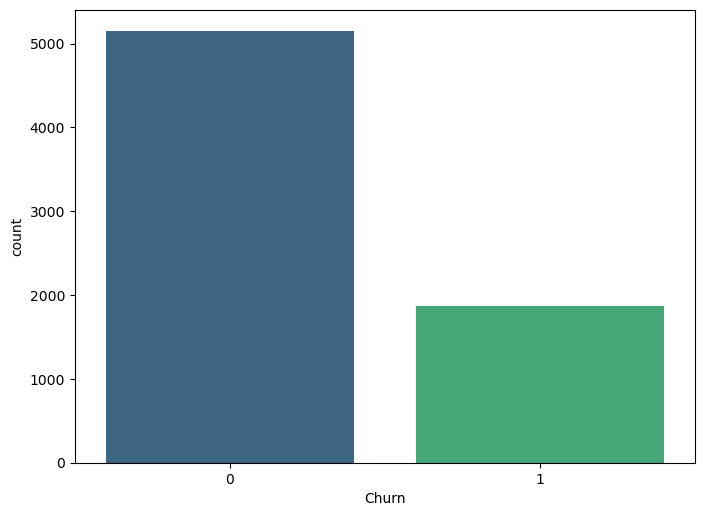

In [12]:
plt.figure(figsize=(8,6),dpi=100)
sb.countplot(data=df,x='Churn',palette='viridis')

In this particular example we have good comparision for the last example stated in the previous section, number of churn.

#### Gender Distribution

In [13]:
g_labels = ['Male', 'Female']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender Distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.18, y=0.5, font_size=20, showarrow=False)])
fig.show()

After analysing this plot we can conclude that the survey was well distributed in gender, ie the number of male customers are similar to the number of female customers.

#### Number of churn for contract type

In [14]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

The shortest the period of the contract, the more probable it is for a customer to churn. Even though for the year and two year contract that difference is not so visible, when we consider the month-to-month contract the number of churn is way bigger.

#### Gender, Tenure and Churn

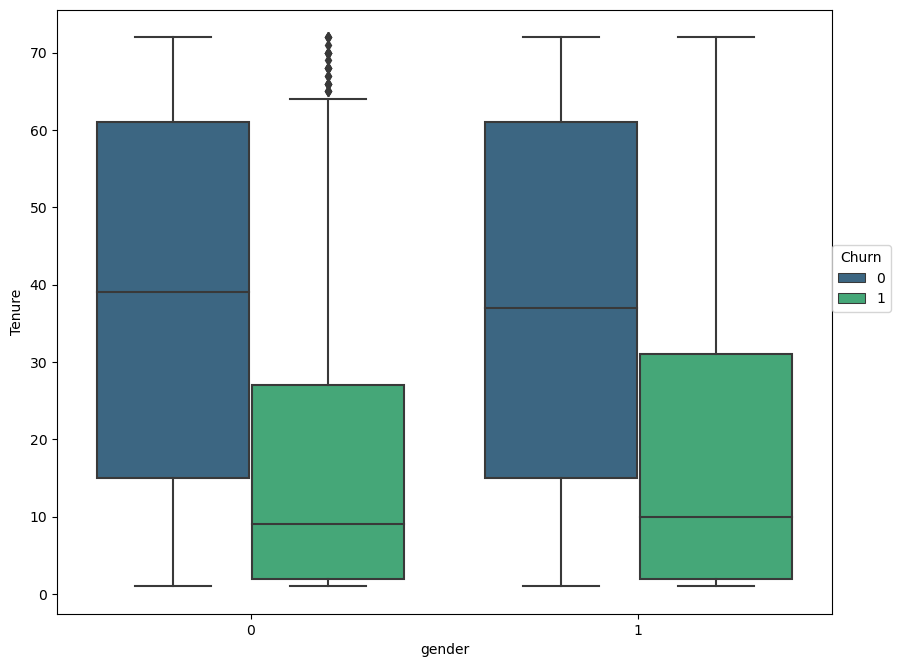

In [15]:
plt.figure(figsize=(10,8),dpi=100)
sb.boxplot(data=df,x='gender',y='Tenure',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")

#### Payment Method Distribution

In [16]:
labels = ["Electronic cheque","Mailed cheque","Bank transfer - automatic","Credit card - automatic"]
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.0)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()


#### Churn Distribution with other Columns

In this subsection we will show some distributions comparing the churn with some other columns to inspect any relation that could affect the results.

In [17]:
df['Partner'] = df['Partner'].replace(1,"Yes")
df['Partner'] = df['Partner'].replace(0,"No")
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.5)
fig.show()
df['Partner'] = df['Partner'].replace("Yes",1)
df['Partner'] = df['Partner'].replace("No",0)

In [18]:
df['Dependents'] = df['Dependents'].replace(1,"Yes")
df['Dependents'] = df['Dependents'].replace(0,"No")
color_map = {"Yes": "#FFA15A", "No": "#00CC96 "}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.5)
fig.show()
df['Dependents'] = df['Dependents'].replace("Yes",1)
df['Dependents'] = df['Dependents'].replace("No",0)

In [19]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace(1,"Yes")
df['OnlineSecurity'] = df['OnlineSecurity'].replace(0,"No")
color_map = {"Yes": "#FFA15A", "No": "#00CC96 "}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
df['OnlineSecurity'] = df['OnlineSecurity'].replace("Yes",1)
df['OnlineSecurity'] = df['OnlineSecurity'].replace("No",0)

In [20]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,"Yes")
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,"No")
color_map = {"Yes": "#FFA15A", "No": "#00CC96 "}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn distribution Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
df['SeniorCitizen'] = df['SeniorCitizen'].replace("Yes",1)
df['SeniorCitizen'] = df['SeniorCitizen'].replace("No",0)

In [21]:
df['TechSupport'] = df['TechSupport'].replace(1,"Yes")
df['TechSupport'] = df['TechSupport'].replace(0,"No")
color_map = {"Yes": "#FFA15A", "No": "#00CC96 "}
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  color_discrete_map=color_map, title="<b>Churn distribution TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
df['TechSupport'] = df['TechSupport'].replace("Yes",1)
df['TechSupport'] = df['TechSupport'].replace("No",0)

In [22]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace(1,"Yes")
df['PaperlessBilling'] = df['PaperlessBilling'].replace(0,"No")
color_map = {"Yes": "#FFA15A", "No": "#00CC96 "}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Churn distribution Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
df['PaperlessBilling'] = df['PaperlessBilling'].replace("Yes",1)
df['PaperlessBilling'] = df['PaperlessBilling'].replace("No",0)

In [23]:
df['PhoneService'] = df['PhoneService'].replace(1,"Yes")
df['PhoneService'] = df['PhoneService'].replace(0,"No")
color_map = {"Yes": "#FFA15A", "No": "#00CC96 "}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn distribution Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()
df['PhoneService'] = df['PhoneService'].replace("Yes",1)
df['PhoneService'] = df['PhoneService'].replace("No",0)

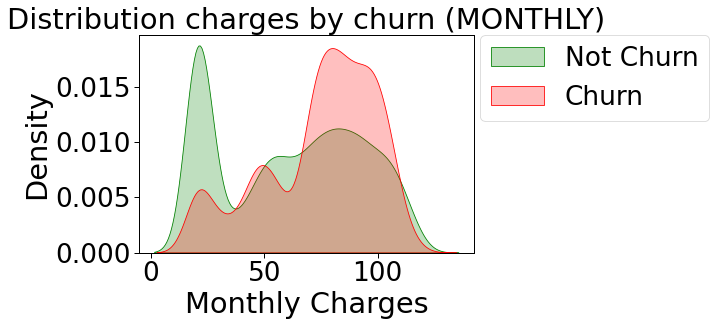

In [24]:
sb.set_context("paper",font_scale=3.0)
ax = sb.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Green", shade = True);

ax = sb.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Red", shade= True);

ax.legend(["Not Churn","Churn"],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

ax.set_title('Distribution charges by churn (MONTHLY)');

ax.set_xlabel('Monthly Charges');

ax.set_ylabel('Density');

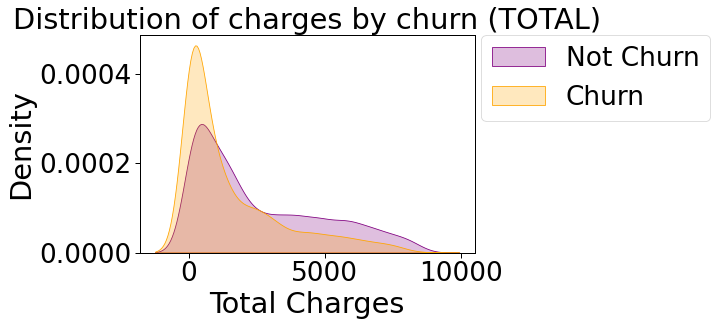

In [25]:
ax = sb.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Purple", shade = True);
ax = sb.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax, color="Orange", shade= True);
ax.legend(["Not Churn","Churn"],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

ax.set_xlabel('Total Charges');

ax.set_title('Distribution of charges by churn (TOTAL)');
ax.set_ylabel('Density');


#### Correlation
The next two code snippets present us the correlation matrix of the dataset, indicating whether or not exists any correlation between all the possible pairs of values in a table according to its coefficient.

In [26]:
df.corr()

gender  SeniorCitizen   Partner  Dependents    Tenure  \
gender            1.000000      -0.001760 -0.002110    0.009524  0.005866   
SeniorCitizen    -0.001760       1.000000  0.016563   -0.210570  0.015723   
Partner          -0.002110       0.016563  1.000000    0.451855  0.382425   
Dependents        0.009524      -0.210570  0.451855    1.000000  0.164455   
Tenure            0.005866       0.015723  0.382425    0.164455  1.000000   
PhoneService     -0.008549       0.009227  0.017812   -0.001377  0.007045   
MultipleLines    -0.009367       0.142312  0.142133   -0.024362  0.332251   
InternetService  -0.010545       0.259308  0.000835   -0.177918  0.031041   
OnlineSecurity   -0.016918      -0.038843  0.142486    0.080455  0.328315   
OnlineBackup     -0.012729       0.066338  0.141844    0.024329  0.360600   
DeviceProtection -0.000406       0.059980  0.153588    0.013912  0.361594   
TechSupport      -0.008442      -0.059794  0.120552    0.063105  0.326773   
StreamingTV      -0.007029       0.105678  0.125233   -0.016076  0.280633   
StreamingMovies  -0.009732       0.119714  0.118543   -0.038585  0.286332   
Contract          0.000721      -0.141680  0.294590    0.241111  0.677242   
PaperlessBilling -0.012334       0.156687 -0.013493   -0.110491  0.005295   
PaymentMethod     0.016269      -0.038541 -0.156976   -0.043060 -0.370064   
MonthlyCharges   -0.014483       0.220199  0.097757   -0.112404  0.246746   
TotalCharges      0.000217       0.102510  0.319383    0.065354  0.825846   
Churn            -0.008808       0.150981 -0.150037   -0.163793 -0.354279   

                  PhoneService  MultipleLines  InternetService  \
gender               -0.008549      -0.009367        -0.010545   
SeniorCitizen         0.009227       0.142312         0.259308   
Partner               0.017812       0.142133         0.000835   
Dependents           -0.001377      -0.024362        -0.177918   
Tenure                0.007045       0.332251         0.031041   
PhoneService          1.000000       0.279607         0.094157   
MultipleLines         0.279607       1.000000         0.344536   
InternetService       0.094157       0.344536         1.000000   
OnlineSecurity       -0.092324       0.097220         0.156485   
OnlineBackup         -0.051948       0.202005         0.307590   
DeviceProtection     -0.069944       0.200293         0.313034   
TechSupport          -0.094964       0.100896         0.165178   
StreamingTV          -0.020413       0.258534         0.430295   
StreamingMovies      -0.032253       0.259122         0.427524   
Contract              0.003002       0.108179        -0.288360   
PaperlessBilling      0.016223       0.163752         0.377826   
PaymentMethod        -0.005128      -0.171605        -0.119199   
MonthlyCharges        0.248316       0.490363         0.905435   
TotalCharges          0.112637       0.468628         0.428088   
Churn                 0.011206       0.040069         0.316485   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
gender                 -0.016918     -0.012729         -0.000406    -0.008442   
SeniorCitizen          -0.038843      0.066338          0.059980    -0.059794   
Partner                 0.142486      0.141844          0.153588     0.120552   
Dependents              0.080455      0.024329          0.013912     0.063105   
Tenure                  0.328315      0.360600          0.361594     0.326773   
PhoneService           -0.092324     -0.051948         -0.069944    -0.094964   
MultipleLines           0.097220      0.202005          0.200293     0.100896   
InternetService         0.156485      0.307590          0.313034     0.165178   
OnlineSecurity          1.000000      0.283583          0.274489     0.355501   
OnlineBackup            0.283583      1.000000          0.302897     0.293912   
DeviceProtection        0.274489      0.302897          1.000000     0.333173   
TechSupport             0.355501      0.293

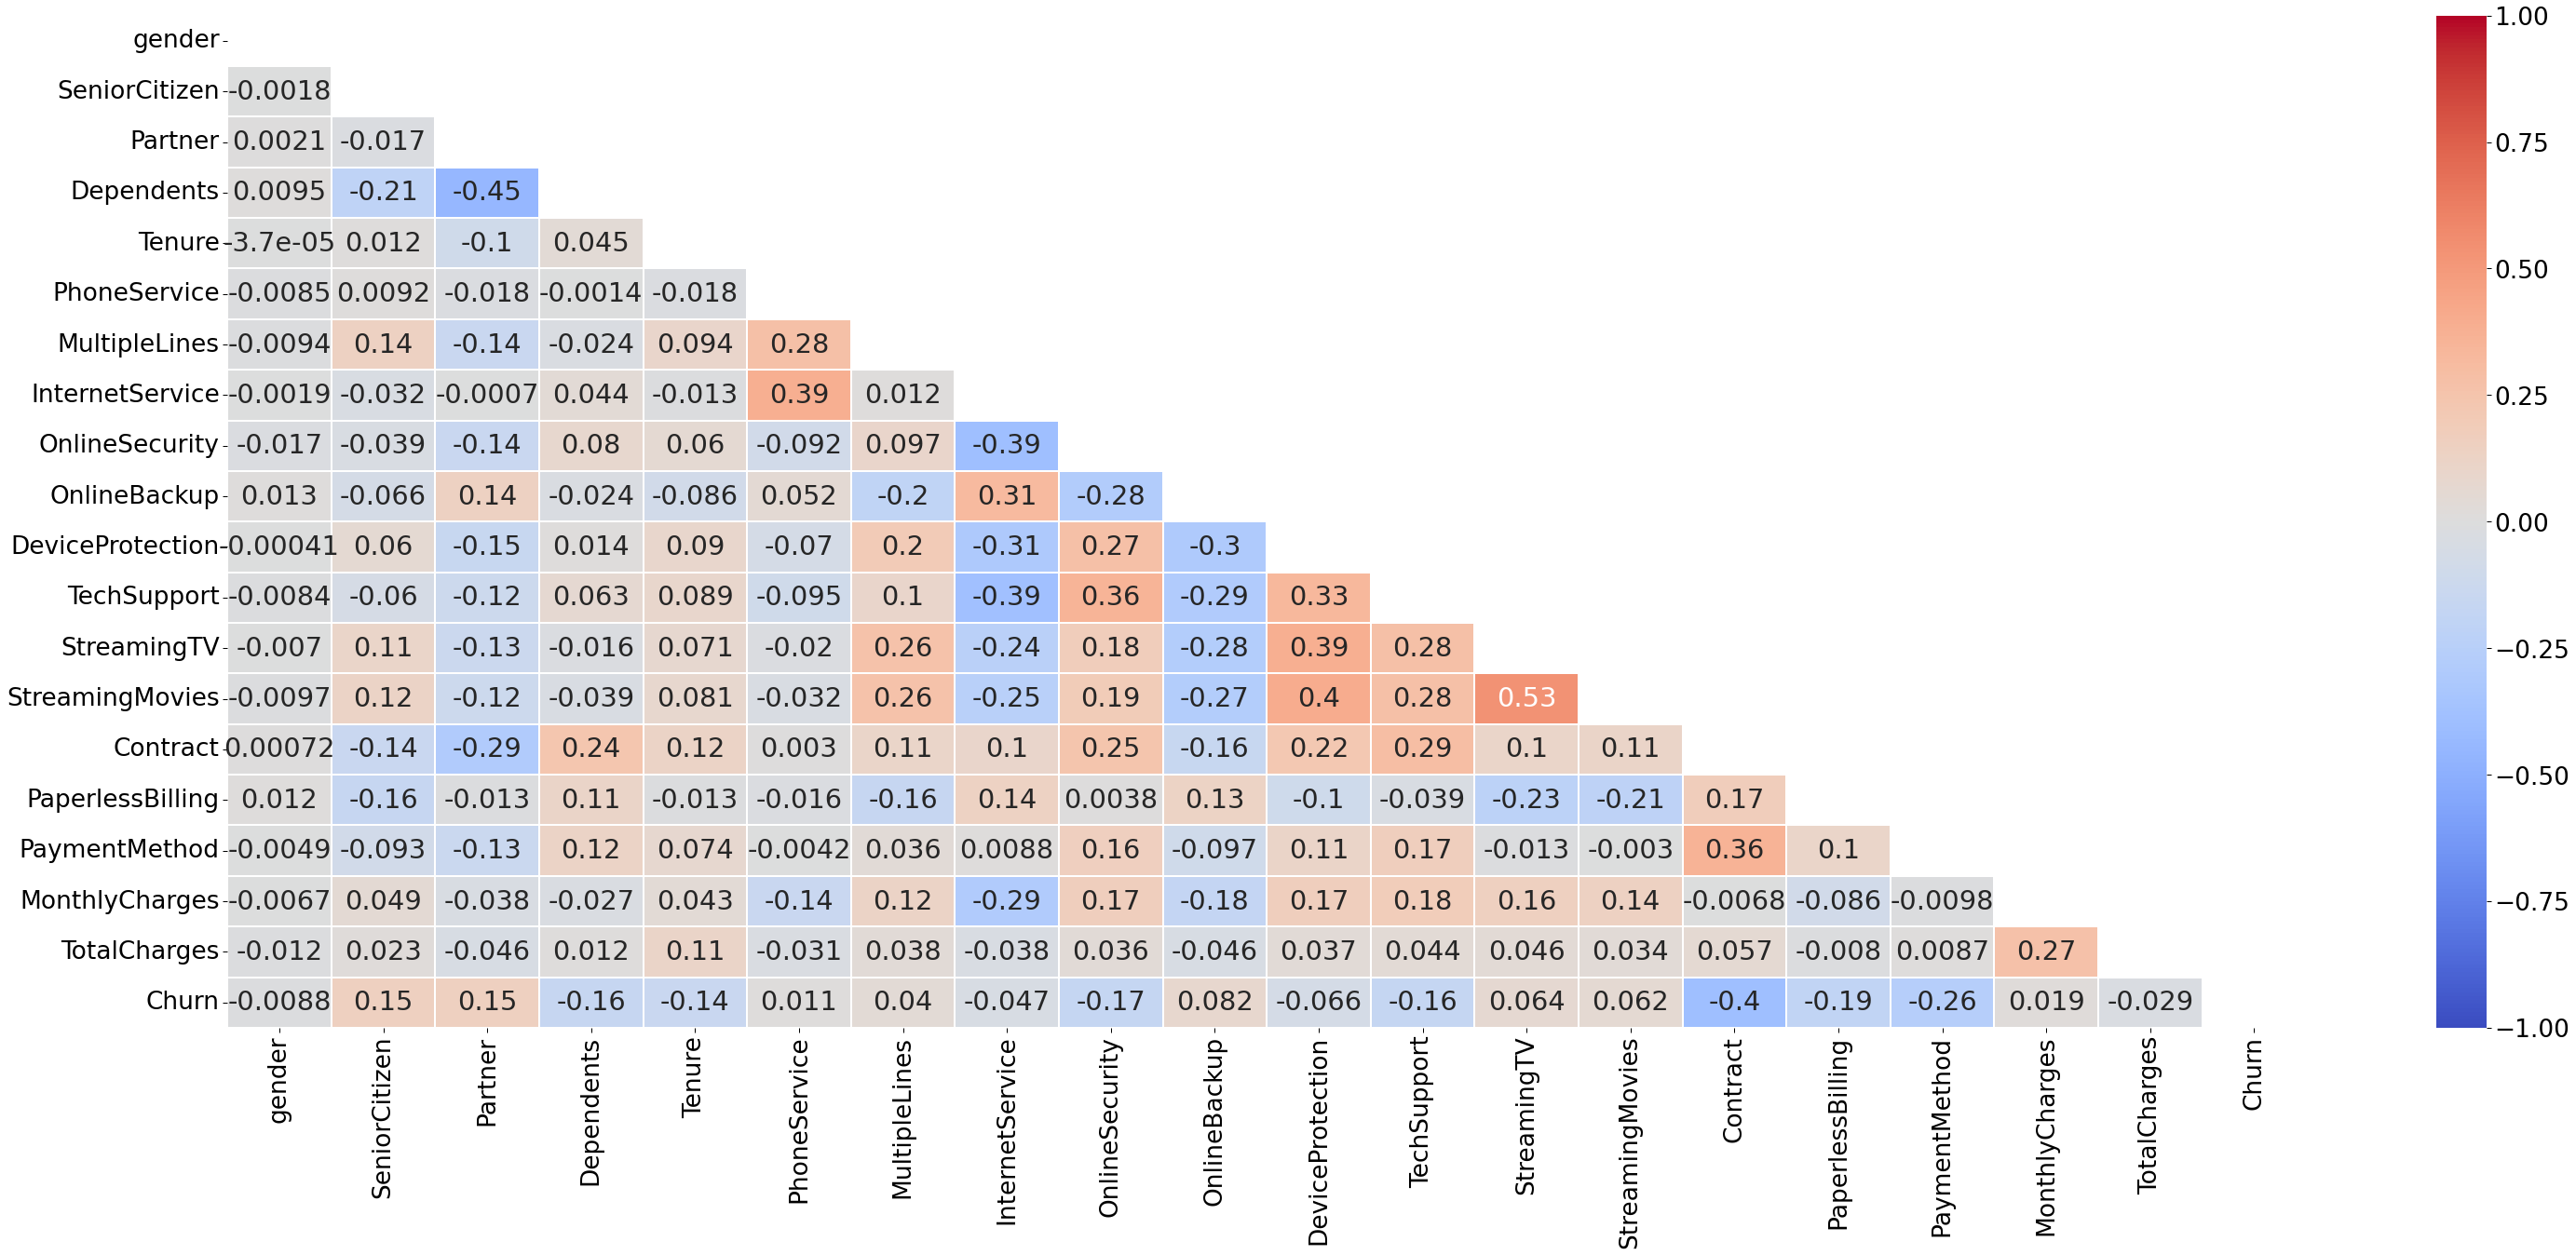

In [27]:
plt.figure(figsize=(50, 20))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sb.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [28]:
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
Tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : [1 2 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [2 3 0 1]
MonthlyCharges : [ 29.85  56.95  53.85 ...  72.   108.35  63.1 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


## Supervised Learning

[[ go back to the top ]](#Table-of-contents)


#### Algorithms imports

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#### Pre-processing
Before running any algorithm let's define which columns need to be analysed. In this case, we don't want to train the Churn Column, we want that column to be our predictable one.

In [30]:
X = df.drop('Churn', 1)
y = df['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 40)

### Algorithms

For our solution we implement 4 algorithms:
* **Decision Tree Classifier**: creates the classification model by building a decision tree
* **Neural Networks**: consists of units (neurons), arranged in layers, which convert an input vector into some output.
* **Support Vector Classifier**: a supervised machine learning model that uses classification algorithms for two-group classification problems
* **K-Nearest Neighbours**: uses 'feature similarity' to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.
* **Random Forest**: is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.
* **Logistic Regression**: estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

### Using default values  

In this first part of our algorithm implementation we will use the default values of each algorithm classifier. Then we compared the results with the original Churn Column.

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

### Decision Tree Classifier

In [33]:
decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(X_train, y_train)
dtc_all_predictions = decision_tree_classifier.predict(X_test)
dtc_score = metrics.accuracy_score(y_test, dtc_all_predictions)
print(dtc_score)

dtc_all_report = classification_report(y_test, dtc_all_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(y_test, dtc_all_predictions)}\n\nClassification report:\n {classification_report(y_test, dtc_all_predictions)}\n")


0.7113519680547633
Original dataset:
 Confusion matrix: 
[[1026  280]
 [ 226  221]]

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1306
           1       0.44      0.49      0.47       447

    accuracy                           0.71      1753
   macro avg       0.63      0.64      0.63      1753
weighted avg       0.72      0.71      0.72      1753




### Neural Networks

In [34]:
nn = MLPClassifier(max_iter=3000)

nn.fit(X_train, y_train)
nn_all_predictions = nn.predict(X_test)
nn_score = metrics.accuracy_score(y_test, nn_all_predictions)
print(nn_score)
nn_all_report = classification_report(y_test, nn_all_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(y_test, nn_all_predictions)}\n\nClassification report:\n {classification_report(y_test, nn_all_predictions)}\n")


0.7769537934968626
Original dataset:
 Confusion matrix: 
[[1276   30]
 [ 361   86]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      1306
           1       0.74      0.19      0.31       447

    accuracy                           0.78      1753
   macro avg       0.76      0.58      0.59      1753
weighted avg       0.77      0.78      0.72      1753




### Support Vector Classification

In [35]:
svc = SVC()

svc.fit(X_train, y_train)
svc_all_predictions = svc.predict(X_test)
svc_score = metrics.accuracy_score(y_test, svc_all_predictions)
print(svc_score)

svc_all_report = classification_report(y_test, svc_all_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(y_test, svc_all_predictions)}\n\nClassification report:\n {classification_report(y_test, svc_all_predictions)}\n")


0.7450085567598402
Original dataset:
 Confusion matrix: 
[[1306    0]
 [ 447    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85      1306
           1       0.00      0.00      0.00       447

    accuracy                           0.75      1753
   macro avg       0.37      0.50      0.43      1753
weighted avg       0.56      0.75      0.64      1753




### K-Nearest Neighbors

In [36]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_all_predictions = knn.predict(X_test)
knn_score = metrics.accuracy_score(y_test, knn_all_predictions)
print(knn_score)

knn_all_report = classification_report(y_test, knn_all_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(y_test, knn_all_predictions)}\n\nClassification report:\n {classification_report(y_test, knn_all_predictions)}\n")


0.7604107244723332
Original dataset:
 Confusion matrix: 
[[1132  174]
 [ 246  201]]

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1306
           1       0.54      0.45      0.49       447

    accuracy                           0.76      1753
   macro avg       0.68      0.66      0.67      1753
weighted avg       0.75      0.76      0.75      1753




### Random Forest

In [37]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf_all_predictions = rf.predict(X_test)
rf_score = metrics.accuracy_score(y_test, rf_all_predictions)
print(rf_score)

rf_all_report = classification_report(y_test, rf_all_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(y_test, rf_all_predictions)}\n\nClassification report:\n {classification_report(y_test, rf_all_predictions)}\n")


0.7820878494010268
Original dataset:
 Confusion matrix: 
[[1167  139]
 [ 243  204]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1306
           1       0.59      0.46      0.52       447

    accuracy                           0.78      1753
   macro avg       0.71      0.67      0.69      1753
weighted avg       0.77      0.78      0.77      1753




### Logistic Regression

In [38]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_all_predictions = lr.predict(X_test)
lr_score = metrics.accuracy_score(y_test, lr_all_predictions)
print(lr_score)

lr_all_report = classification_report(y_test, lr_all_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(y_test, lr_all_predictions)}\n\nClassification report:\n {classification_report(y_test, lr_all_predictions)}\n")


0.8088990302338848
Original dataset:
 Confusion matrix: 
[[1162  144]
 [ 191  256]]

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1306
           1       0.64      0.57      0.60       447

    accuracy                           0.81      1753
   macro avg       0.75      0.73      0.74      1753
weighted avg       0.80      0.81      0.81      1753




### Algorithm's results comparision

In [39]:
vals = [dtc_score,nn_score,svc_score,knn_score,rf_score,lr_score]
labels=["Decision Tree","Neural Networks","Support Vector","K-Nearest Neighbour","Random Forest","Logistic Regression"]

fig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparision<b>",labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'},orientation = 'h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()

Then, we use the voting classifier to train the top 3 models according to the previous results. And we had the following result:

In [40]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('nn', nn), ('lr', lr), ('rf', rf)], voting='soft')
vc.fit(X_train, y_train)
predictions = vc.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))



Final Accuracy Score 
0.8003422703936109


### Parameter Tuning using GridSearchCV

In this second part of our algorithm implementation we implemented GridSearch for the algorithms. This means that, for each algorithm used, we define a group of parameters and run all the algorithms with those parameters. Then we can see which is the best parameter combination by choosing the one with the best score.


> Note: For the Support Vector Classifier and Neural Networks algorithms, even though we implemented gridsearch, the final result was taking too much time. For that reason those code snippets implementations are commented for errors do not occur.

In [41]:
from sklearn.model_selection import GridSearchCV

### Decision Tree Classifier

Parameters Tested:
- **criterion**:The function to measure the quality of a split.
- **splitter**:The strategy used to choose the split at each node.
- **max_depth**:The maximum depth of the tree.
- **max_features**:The number of features to consider when looking for the best split.

In [42]:
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [13, 14, 15, 16, 17],
                  'max_features': [10, 11, 12, 13, 14]}

dtc_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=dtc_param_grid,
                           cv=10,
                           verbose=3)


dtc_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

dtc = dtc_grid_search.best_estimator_
dtc_prediction = dtc.predict(X_test)
best_report = classification_report(y_test, dtc_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(y_test, dtc_prediction)}\n\nClassification report:\n {classification_report(y_test, dtc_prediction)}\n")


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END criterion=gini, max_depth=13, max_features=10, splitter=best;, score=0.745 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=10, splitter=best;, score=0.743 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=13, max_features=10, splitter=best;, score=0.741 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=13, max_features=10, splitter=best;, score=0.734 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=13, max_features=10, splitter=best;, score=0.719 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=10, splitter=best;, score=0.734 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=10, splitter=best;, score=0.743 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=10, splitter=best;, score=0.740 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=10, splitter=b

[CV 1/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.721 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.755 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.740 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.760 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.721 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.766 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.757 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.774 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=13, max_features=14, splitter=best;, score=0.749 total time=   0.0s
[CV 10/10] END criterion=gin

[CV 10/10] END criterion=gini, max_depth=14, max_features=12, splitter=random;, score=0.701 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=14, max_features=13, splitter=best;, score=0.722 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=14, max_features=13, splitter=best;, score=0.728 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=14, max_features=13, splitter=best;, score=0.719 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=14, max_features=13, splitter=best;, score=0.762 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=14, max_features=13, splitter=best;, score=0.719 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=13, splitter=best;, score=0.768 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=13, splitter=best;, score=0.738 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=13, splitter=best;, score=0.738 total time=   0.0s
[CV 9/10] END criterion=g

[CV 4/10] END criterion=gini, max_depth=15, max_features=12, splitter=best;, score=0.740 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, max_features=12, splitter=best;, score=0.705 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, max_features=12, splitter=best;, score=0.759 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, max_features=12, splitter=best;, score=0.743 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, max_features=12, splitter=best;, score=0.738 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, max_features=12, splitter=best;, score=0.703 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, max_features=12, splitter=best;, score=0.688 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, max_features=12, splitter=random;, score=0.717 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, max_features=12, splitter=random;, score=0.741 total time=   0.0s
[CV 3/10] END criterion

[CV 4/10] END criterion=gini, max_depth=16, max_features=11, splitter=best;, score=0.740 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=11, splitter=best;, score=0.719 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=11, splitter=best;, score=0.755 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=11, splitter=best;, score=0.734 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=11, splitter=best;, score=0.766 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=11, splitter=best;, score=0.712 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=11, splitter=best;, score=0.730 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=11, splitter=random;, score=0.717 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=16, max_features=11, splitter=random;, score=0.721 total time=   0.0s
[CV 3/10] END criterion

[CV 7/10] END criterion=gini, max_depth=17, max_features=10, splitter=best;, score=0.753 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=10, splitter=best;, score=0.726 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=10, splitter=best;, score=0.749 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=17, max_features=10, splitter=best;, score=0.705 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=17, max_features=10, splitter=random;, score=0.696 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=17, max_features=10, splitter=random;, score=0.760 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=10, splitter=random;, score=0.730 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=10, splitter=random;, score=0.751 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=10, splitter=random;, score=0.732 total time=   0.0s
[CV 6/10] END cri

[CV 2/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.759 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.711 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.745 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.738 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.715 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.707 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.690 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.710 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=17, max_features=14, splitter=random;, score=0.688 total time=   0.0s
[CV 1/10]

[CV 9/10] END criterion=entropy, max_depth=13, max_features=13, splitter=random;, score=0.739 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=13, max_features=13, splitter=random;, score=0.735 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=14, splitter=best;, score=0.736 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=13, max_features=14, splitter=best;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=13, max_features=14, splitter=best;, score=0.766 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=13, max_features=14, splitter=best;, score=0.762 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=13, max_features=14, splitter=best;, score=0.726 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=13, max_features=14, splitter=best;, score=0.751 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=13, max_features=14, splitter=best;, score=0.749 total time=   0

[CV 1/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.741 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.766 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.743 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.793 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.757 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.749 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.760 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.741 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=14, max_features=13, splitter=best;, score=0.750 total time=   0.0s
[

[CV 10/10] END criterion=entropy, max_depth=15, max_features=11, splitter=random;, score=0.718 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, max_features=12, splitter=best;, score=0.762 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, max_features=12, splitter=best;, score=0.757 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=12, splitter=best;, score=0.740 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=12, splitter=best;, score=0.736 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=12, splitter=best;, score=0.722 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=12, splitter=best;, score=0.747 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, max_features=12, splitter=best;, score=0.759 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, max_features=12, splitter=best;, score=0.743 total time=   0.0

[CV 10/10] END criterion=entropy, max_depth=16, max_features=10, splitter=random;, score=0.690 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=16, max_features=11, splitter=best;, score=0.740 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=16, max_features=11, splitter=best;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=11, splitter=best;, score=0.751 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=11, splitter=best;, score=0.734 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, max_features=11, splitter=best;, score=0.715 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=11, splitter=best;, score=0.755 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=11, splitter=best;, score=0.732 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=11, splitter=best;, score=0.740 total time=   0.0

[CV 4/10] END criterion=entropy, max_depth=16, max_features=14, splitter=random;, score=0.732 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, max_features=14, splitter=random;, score=0.730 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=14, splitter=random;, score=0.751 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=14, splitter=random;, score=0.759 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=14, splitter=random;, score=0.757 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=14, splitter=random;, score=0.743 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=14, splitter=random;, score=0.720 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=10, splitter=best;, score=0.743 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=10, splitter=best;, score=0.749 total

[CV 10/10] END criterion=entropy, max_depth=17, max_features=13, splitter=best;, score=0.720 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=13, splitter=random;, score=0.722 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=13, splitter=random;, score=0.738 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, max_features=13, splitter=random;, score=0.728 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=17, max_features=13, splitter=random;, score=0.707 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=13, splitter=random;, score=0.740 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, max_features=13, splitter=random;, score=0.743 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=17, max_features=13, splitter=random;, score=0.743 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=17, max_features=13, splitter=random;, score=0.760 tot

### Support Vector Classification
Parameters Tested:
- **C**: Regularization parameter. The strength of the regularization is inversely proportional to C.
- **gamma**:Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
- **kernel**:Specifies the kernel type to be used in the algorithm. 

In [43]:
'''
svc_param_grid = {'C' : [0.1, 1, 10, 100], 
            'gamma' : ['scale', 'auto'],
            'kernel': ['poly', 'rbf', 'sigmoid']}

svc_grid_search = GridSearchCV(SVC(),
                           param_grid=svc_param_grid,
                           cv=5,
                           verbose=3, n_jobs=-1)
'''

"\nsvc_param_grid = {'C' : [0.1, 1, 10, 100], \n            'gamma' : ['scale', 'auto'],\n            'kernel': ['poly', 'rbf', 'sigmoid']}\n\nsvc_grid_search = GridSearchCV(SVC(),\n                           param_grid=svc_param_grid,\n                           cv=5,\n                           verbose=3, n_jobs=-1)\n"

In [44]:
'''
svc_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(svc_grid_search.best_score_))
print('Best parameters: {}'.format(svc_grid_search.best_params_))
print('Best estimator: {}'.format(svc_grid_search.best_estimator_))


svc = svc_grid_search.best_estimator_
svc_prediction = svc.predict(X_test)
best_report = classification_report(y_test, svc_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(y_test, svc_prediction)}\n\nClassification report:\n {classification_report(y_test, svc_prediction)}\n")
'''

'\nsvc_grid_search.fit(X_train, y_train)\nprint(\'Best score: {}\'.format(svc_grid_search.best_score_))\nprint(\'Best parameters: {}\'.format(svc_grid_search.best_params_))\nprint(\'Best estimator: {}\'.format(svc_grid_search.best_estimator_))\n\n\nsvc = svc_grid_search.best_estimator_\nsvc_prediction = svc.predict(X_test)\nbest_report = classification_report(y_test, svc_prediction, output_dict=True)\n\nprint("---  ---\n")\nprint(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(y_test, svc_prediction)}\n\nClassification report:\n {classification_report(y_test, svc_prediction)}\n")\n'

### KNN
Parameters Tested:
- **n_neighbors**:Number of neighbors to use by default for kneighbors queries.
- **weights**:Weight function used in prediction. 
- **algorithm**:Algorithm used to compute the nearest neighbors:
  - 'ball_tree’ will use BallTree
  - ‘kd_tree’ will use KDTree
  - ‘brute’ will use a brute-force search.
    

In [45]:
knn_param_grid = {'n_neighbors': [4, 5, 6, 7, 8, 9, 19],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['ball_tree', 'kd_tree', 'brute']}

knn_grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid=knn_param_grid,
                           cv=10,verbose=4,n_jobs=-1)

In [46]:
knn_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(knn_grid_search.best_score_))
print('Best parameters: {}'.format(knn_grid_search.best_params_))
print('Best estimator: {}'.format(knn_grid_search.best_estimator_))

knn = knn_grid_search.best_estimator_
knn_prediction = knn.predict(X_test)
best_report = classification_report(y_test, knn_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(y_test, knn_prediction)}\n\nClassification report:\n {classification_report(y_test, knn_prediction)}\n")


Fitting 10 folds for each of 42 candidates, totalling 420 fits
Best score: 0.7822317581024805
Best parameters: {'algorithm': 'brute', 'n_neighbors': 8, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(algorithm='brute', n_neighbors=8)
---  ---

Improved original dataset
 Confusion matrix: 
[[1201  105]
 [ 278  169]]

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1306
           1       0.62      0.38      0.47       447

    accuracy                           0.78      1753
   macro avg       0.71      0.65      0.67      1753
weighted avg       0.76      0.78      0.76      1753




### Neural Networks
Parameters Tested:
- **activation**:Activation function for the hidden layer.
- **solver**:The solver for weight optimization.
- **alpha**:Strength of the L2 regularization term.
- **hidden_layer_sizes**:     The ith element represents the number of neurons in the ith hidden layer.
- **max_iter**: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.


In [47]:
'''
nn_param_grid = {
    'activation' : ['tanh', 'logistic', 'identity', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01], 
    'hidden_layer_sizes': [10, 50, 100],
    'max_iter' : [1000]}

nn_grid_search = GridSearchCV(MLPClassifier(), 
                        param_grid=nn_param_grid, 
                        cv=10,
                        verbose=3, n_jobs=-1)
'''

"\nnn_param_grid = {\n    'activation' : ['tanh', 'logistic', 'identity', 'relu'],\n    'solver': ['lbfgs', 'sgd', 'adam'],\n    'alpha': [0.0001, 0.001, 0.01], \n    'hidden_layer_sizes': [10, 50, 100],\n    'max_iter' : [1000]}\n\nnn_grid_search = GridSearchCV(MLPClassifier(), \n                        param_grid=nn_param_grid, \n                        cv=10,\n                        verbose=3, n_jobs=-1)\n"

In [48]:
'''
nn_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(nn_grid_search.best_score_))
print('Best parameters: {}'.format(nn_grid_search.best_params_))
print('Best estimator: {}'.format(nn_grid_search.best_estimator_))


nn = nn_grid_search.best_estimator_
nn_prediction = nn.predict(X_test)
best_report = classification_report(y_test, nn_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(y_test, nn_prediction)}\n\nClassification report:\n {classification_report(y_test, nn_prediction)}\n")
'''

'\nnn_grid_search.fit(X_train, y_train)\nprint(\'Best score: {}\'.format(nn_grid_search.best_score_))\nprint(\'Best parameters: {}\'.format(nn_grid_search.best_params_))\nprint(\'Best estimator: {}\'.format(nn_grid_search.best_estimator_))\n\n\nnn = nn_grid_search.best_estimator_\nnn_prediction = nn.predict(X_test)\nbest_report = classification_report(y_test, nn_prediction, output_dict=True)\n\nprint("---  ---\n")\nprint(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(y_test, nn_prediction)}\n\nClassification report:\n {classification_report(y_test, nn_prediction)}\n")\n'

### Random Forest
Parameters Tested:
- **n_estimators**:The number of trees in the forest.
- **max_features**:The number of features to consider when looking for the best split.
- **max_depth**:The maximum depth of the tree. 
- **criterion**:The function to measure the quality of a split.

In [49]:
rf_param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid=rf_param_grid, cv= 5)

In [50]:
rf_grid_search.fit(X_train, y_train)

print('Best score: {}'.format(rf_grid_search.best_score_))
print('Best parameters: {}'.format(rf_grid_search.best_params_))
print('Best estimator: {}'.format(rf_grid_search.best_estimator_))


rf = rf_grid_search.best_estimator_
rf_prediction = rf.predict(X_test)
best_report = classification_report(y_test, rf_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(y_test, rf_prediction)}\n\nClassification report:\n {classification_report(y_test, rf_prediction)}\n")


Best score: 0.7995418088150702
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=200)
---  ---

Improved original dataset
 Confusion matrix: 
[[1186  120]
 [ 223  224]]

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1306
           1       0.65      0.50      0.57       447

    accuracy                           0.80      1753
   macro avg       0.75      0.70      0.72      1753
weighted avg       0.79      0.80      0.80      1753




### Logistic Regression
Parameters Tested:
- **C**:Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
- **penalty**:Specify the norm of the penalty.
- **solver**:Algorithm to use in the optimization problem.

In [51]:
lr_param_grid = { 
    'C' : [0.1, 1, 10, 100], 
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid=lr_param_grid, cv= 5)

In [52]:
lr_grid_search.fit(X_train, y_train)

print('Best score: {}'.format(lr_grid_search.best_score_))
print('Best parameters: {}'.format(lr_grid_search.best_params_))
print('Best estimator: {}'.format(lr_grid_search.best_estimator_))


lr = lr_grid_search.best_estimator_
lr_prediction = lr.predict(X_test)
best_report = classification_report(y_test, lr_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(y_test, lr_prediction)}\n\nClassification report:\n {classification_report(y_test, lr_prediction)}\n")


[CV 4/10] END algorithm=ball_tree, n_neighbors=4, weights=uniform;, score=0.768 total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.762 total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.787 total time=   0.1s
[CV 7/10] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.781 total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.774 total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.776 total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.770 total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=7, weights=uniform;, score=0.762 total time=   0.1s
[CV 10/10] END algorithm=ball_tree, n_neighbors=7, weights=uniform;, score=0.747 total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=9, weights=uniform;, score=0.808 total time=   0.0s
[CV 6/

[CV 8/10] END algorithm=ball_tree, n_neighbors=4, weights=uniform;, score=0.785 total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.747 total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.776 total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.789 total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.747 total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.741 total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=7, weights=distance;, score=0.762 total time=   0.0s
[CV 4/10] END algorithm=ball_tree, n_neighbors=7, weights=distance;, score=0.760 total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.781 total time=   0.1s
[CV 2/10] END algorithm=ball_tree, n_neighbors=8, weights=uniform;, score=0.762 total time=   0.1s
[CV

[CV 3/10] END algorithm=ball_tree, n_neighbors=4, weights=uniform;, score=0.755 total time=   0.1s
[CV 3/10] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.734 total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.760 total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=4, weights=distance;, score=0.759 total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.766 total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.776 total time=   0.1s
[CV 6/10] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.760 total time=   0.0s
[CV 4/10] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.776 total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.774 total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.762 total time=   0.0s
[CV 

[CV 6/10] END algorithm=ball_tree, n_neighbors=4, weights=uniform;, score=0.772 total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.747 total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.791 total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=7, weights=uniform;, score=0.778 total time=   0.0s
[CV 2/10] END algorithm=ball_tree, n_neighbors=7, weights=uniform;, score=0.740 total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=7, weights=distance;, score=0.787 total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=7, weights=distance;, score=0.778 total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=9, weights=uniform;, score=0.772 total time=   0.1s
[CV 2/10] END algorithm=ball_tree, n_neighbors=9, weights=uniform;, score=0.764 total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=9, weights=uniform;, score=0.770 total time=   0.0s
[CV 4/1

Best score: 0.8016337871228922
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator: LogisticRegression(C=1, solver='liblinear')
---  ---

Improved original dataset
 Confusion matrix: 
[[1158  148]
 [ 185  262]]

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1306
           1       0.64      0.59      0.61       447

    accuracy                           0.81      1753
   macro avg       0.75      0.74      0.74      1753
weighted avg       0.81      0.81      0.81      1753




### Algorithm's results comparision

In [53]:
vals = [dtc_grid_search.best_score_,knn_grid_search.best_score_,rf_grid_search.best_score_,lr_grid_search.best_score_]
labels=["Decision Tree","K-Nearest Neighbour","Random Forest","Logistic Regression"]

fig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparision<b>",labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'},orientation = 'h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()

Again, let's introduce Voting Classifier for the top 3 algorithms

In [54]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('nn', nn), ('lr', lr), ('rf', rf)], voting='soft')
vc.fit(X_train, y_train)
predictions = vc.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))



Final Accuracy Score 
0.7957786651454649


## Conclusions
[[ go back to the top ]](#Table-of-contents)

All in all, with this project we learned a little bit more about Machine Learning, specially about Supervised Learning.   

For this we were first introduced to data pre-processing and visualization, which means becoming familiar with the dataset proposed for study and all the data manipulation needed for our results have a reliable meaning.
Then, we started to perform some models using the algorithms provided by the libraries used, which was something that we learn in this project, the hability to work with some python libraries and tools which were unknown for us some weeks ago.   

Using the obtained score for each algorithm we also plotted their performance.
Even though, we have achieved good results, these could've been better if more data have been manipulated, for example removing some columns which, according to the data visualization analysis, were not important to affect churn.


## References
[[ go back to the top ]](#Table-of-contents)


Moodle Course Files - https://moodle.up.pt/

Kaggle Project Dataset - https://www.kaggle.com/datasets/easonlai/sample-telco-customer-churn-dataset

Scikit-Learn website - https://scikit-learn.org/stable/index.html#